# Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [294]:
from __future__ import print_function, division
import requests
import math
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNet
from sklearn.cross_validation import cross_val_score
from sklearn import feature_selection as f_select
from sklearn.metrics import mean_squared_error
import re
%matplotlib inline

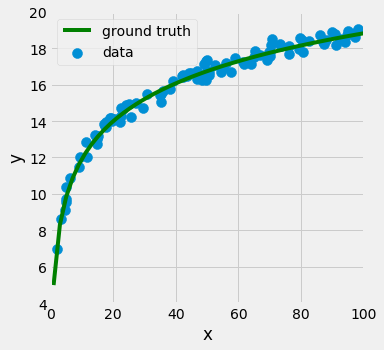

In [295]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

# We start by seeding the random number generator so that everyone will have the same "random" results
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return  3*np.log(x) + 5

def q(x):
    return x + x**2

def lo(x):
    return np.log(x)

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(1, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(1, 100, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1);
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((4, 20))
ax.set_xlim((0, 100))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [296]:
# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((4, 20))
    ax.set_xlim((0, 100))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right',frameon=True)

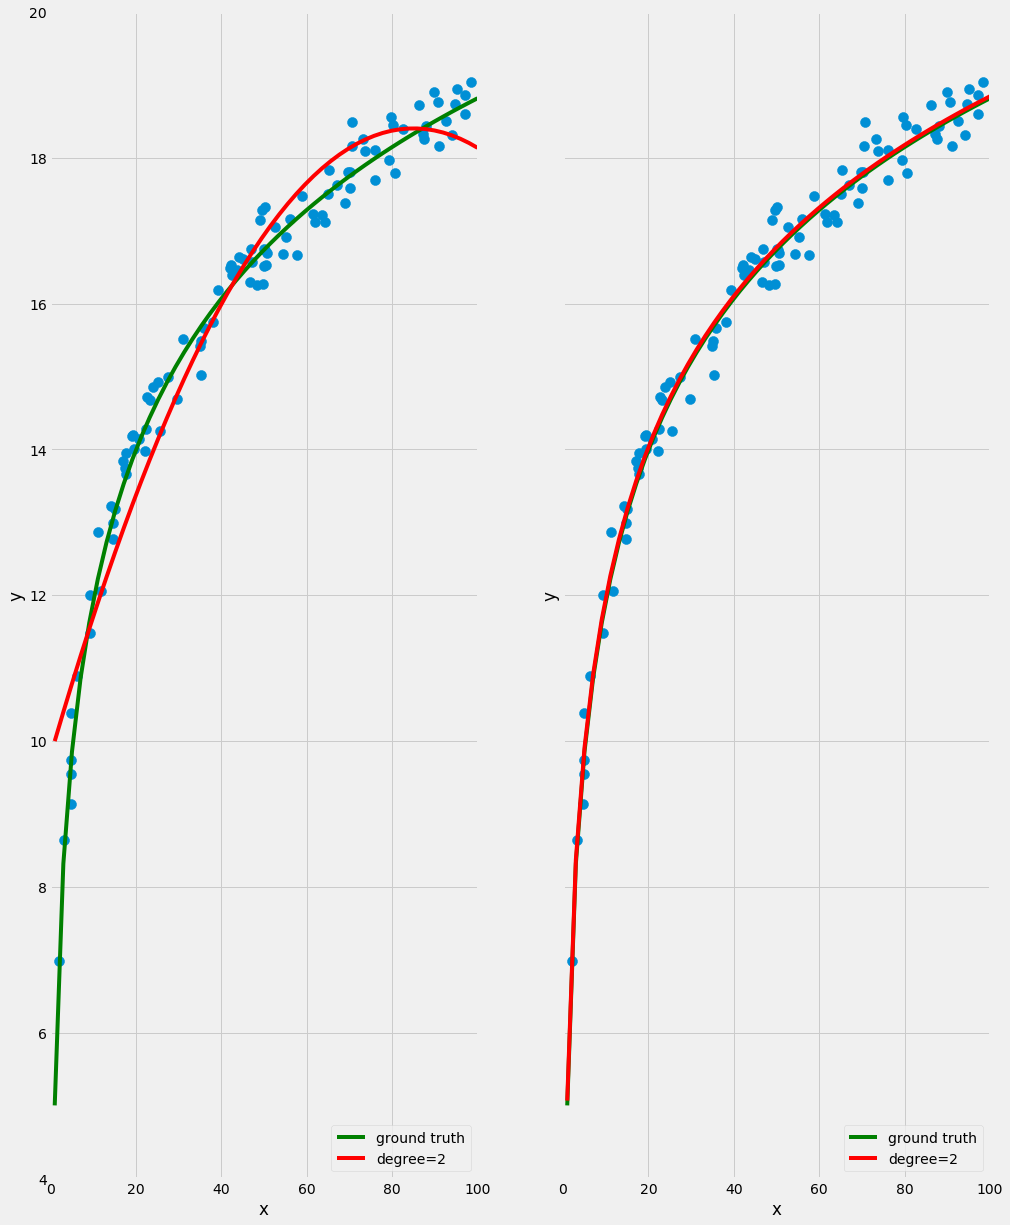

In [297]:
# Set up the plot
fig,ax = plt.subplots(1,2, figsize=(15, 20), sharex=True, sharey=True)
# Set the degree of our polynomial
degree = 2

# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

est2 = make_pipeline(FunctionTransformer(lambda x: np.log(x)), LinearRegression())


# Fit our model to the training data
est.fit(X, y)

est2.fit(X, y)
# Plot the results
plot_approximation(est, ax[0], label='degree=%d' % degree)
plot_approximation(est2, ax[1], label='degree=%d' % degree)



# Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [298]:
def f2(x):
    return 4 + 3*x + 6*x**2

np.random.seed(9)
# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(-10, 10, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(-10, 10, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f2(X) + np.random.normal(scale=50, size=n_samples)[:, np.newaxis]



In [299]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
new = lr.fit(X_train, y_train)
new2 = lr.fit(X_test, y_test)
# Evaluate the model against the testing data

print(mean_squared_error(y_train, new.predict(X_train)))
print(mean_squared_error(y_test, new2.predict(X_test))) 

33995.5527108
36638.6498623


# Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

- training error
- test error
- R squared
- AIC

In [300]:
# Plot the results of a pipeline against ground truth and actual data
def plot_approximation2(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f2(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-100, 700))
    ax.set_xlim((-11,11))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right',frameon=True)

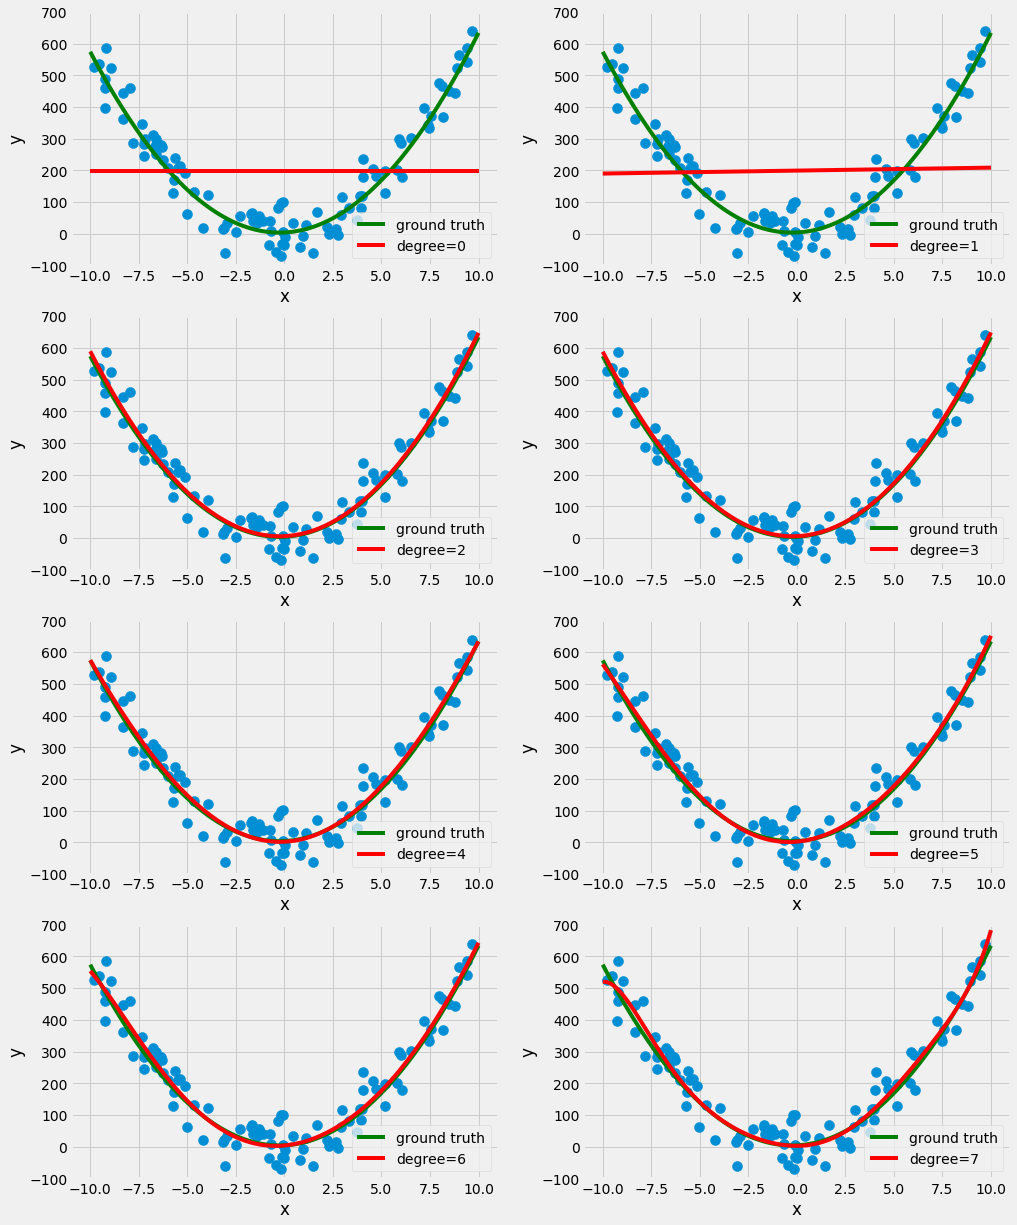

In [301]:
fig, ax_rows = plt.subplots(4, 2, figsize=(15, 20))
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, y)
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[int(degree/2)]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation2(est, ax, label='degree=%d' % degree)

In [364]:
# Plot the results of a pipeline against ground truth and actual data
def plot_err(new, new2, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(np.linspace(0, len(new)-1, len(new)), new, color = 'red', label = 'Training Error')
    ax.plot(np.linspace(0, len(new2)-1, len(new2)), new2, label = 'Test Error')
    #ax.set_ylim((30000, 40000))
    ax.set_xlim((0, len(new)-1))
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree')
    ax.legend(loc='lower right',frameon=True)

In [365]:
# Plot the results of a pipeline against ground truth and actual data
def plot_r_sqrd(r_sqrd, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(np.linspace(0, 7, 8), r_sqrd, label = 'R squared')
    #ax.set_ylim((30000, 40000))
    ax.set_xlim((0, 7))
    ax.set_ylabel('R squared')
    ax.set_xlabel('Degree')
    ax.legend(loc='lower right',frameon=True)

In [369]:
def plot_AIC(AIC, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(np.linspace(0, 7, 8), AIC, label = 'AIC')
    #ax.set_ylim((30000, 40000))
    ax.set_xlim((0, 7))
    ax.set_ylabel('AIC')
    ax.set_xlabel('Degree')
    ax.legend(loc='lower right',frameon=True)

In [376]:

training_err = []
test_err = []
r_sqrd = []
Aic = []
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # INSTRUCTOR NOTE: Run this multiple times to show the variation
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # Fit the model against the training data
    new = est.fit(X_train, y_train)
    new2 = est.fit(X_test, y_test)
    new3 = est.score(X,y)
    new4 = est.fit(X,y)
    y_hat = new4.predict(X)
    resid = y - y_hat
    sse = sum(resid**2)
    k= degree# of variables
    AIC= 2*k - 2*np.log(sse)
    #model = est.fit()
    training_err.append(mean_squared_error(y_train, new.predict(X_train)))
    test_err.append(mean_squared_error(y_test, new2.predict(X_test)))
    r_sqrd.append(float(new3))
    Aic.append(float(AIC))
   
                  


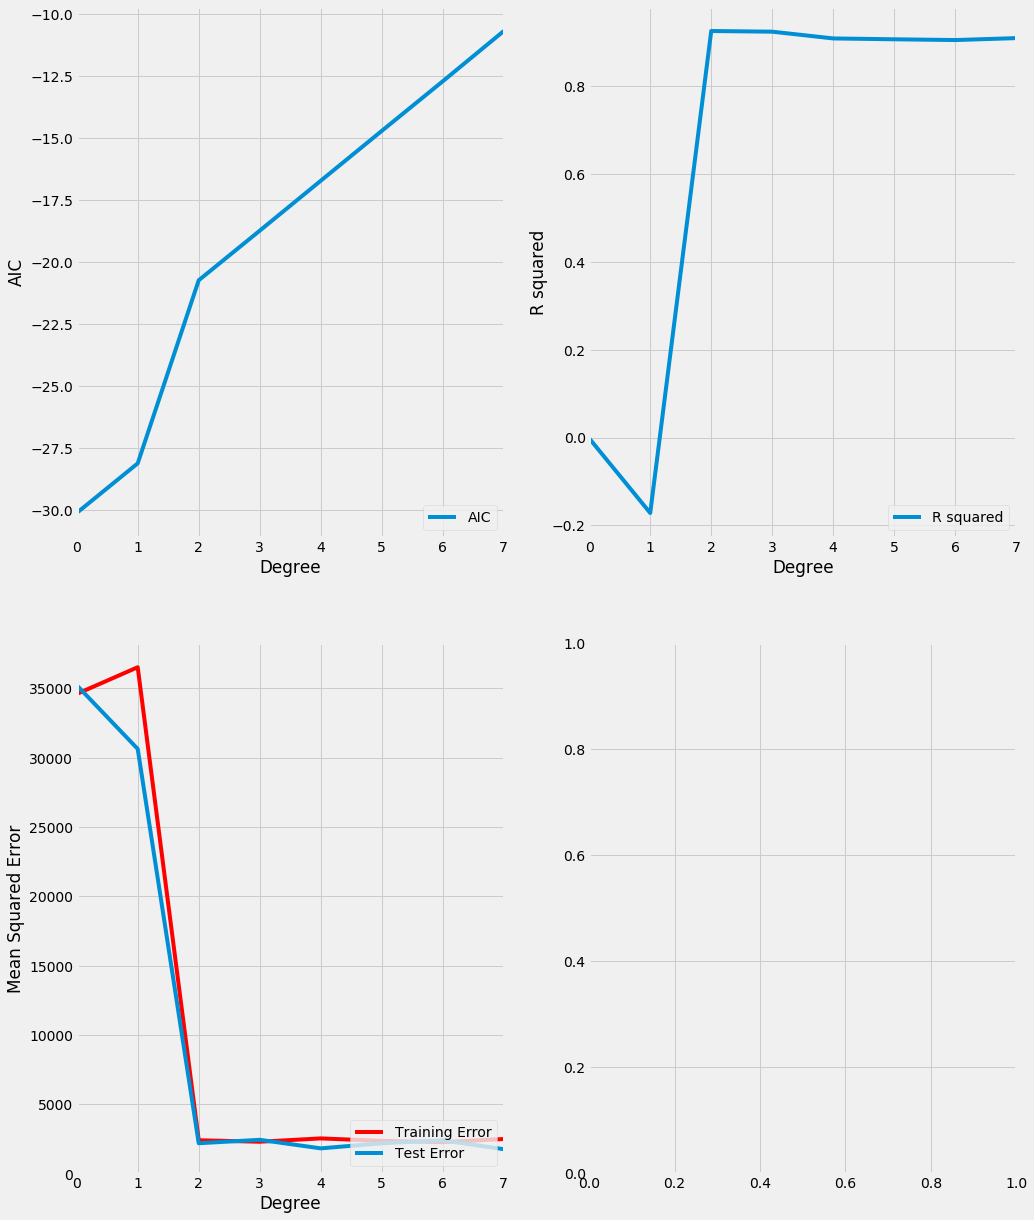

In [377]:
fig, ax = plt.subplots(2, 2, figsize=(15, 20))
plot_AIC(Aic, ax[0][0])
plot_r_sqrd(r_sqrd, ax[0][1])
plot_err(training_err, test_err, ax[1][0])

# Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [411]:
mlist = np.linspace(5,95,19)


In [420]:
test_err2 = []
training_err2 = []

for m in mlist:
    est = make_pipeline(PolynomialFeatures(2), LinearRegression())
    # INSTRUCTOR NOTE: Run this multiple times to show the variation
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=m/100)
    # Fit the model against the training data
    new = est.fit(X_train, y_train)
    new2 = est.fit(X_test, y_test)
    #model = est.fit()
    training_err2.append(mean_squared_error(y_train, new.predict(X_train)))
    test_err2.append(mean_squared_error(y_test, new2.predict(X_test)))
   

In [421]:
# Plot the results of a pipeline against ground truth and actual data
def plot_err2(new, new2, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    plt.plot(mlist, new, color = 'red', label = 'Training Error')
    plt.plot(mlist, new2, label = 'Test Error')
    #ax.set_ylim((30000, 40000))
    plt.xlim((0, 100))
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Test Size')
    plt.legend(loc='lower right',frameon=True)

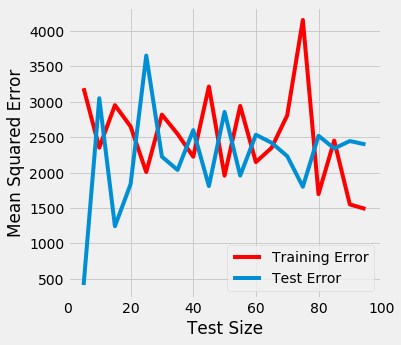

In [422]:
plot_err2(training_err2, test_err2)